<h1>
    <center>
        Multi-Class Classification Tutorial with the Keras Deep Learning Library

Click [here](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/) to find the original page of this tutorial

Keras is a Python library for deep learning that wraps the efficient numerical libraries Theano and TensorFlow.

In this tutorial, you will discover how to use Keras to develop and evaluate neural network models for multi-class classification problems.

After completing this step-by-step tutorial, you will know:

*    How to load data from CSV and make it available to Keras
*    How to prepare multi-class classification data for modeling with neural networks
*    How to evaluate Keras neural network models with scikit-learn

Kick-start your project with my new book Deep Learning With Python, including step-by-step tutorials and the Python source code files for all examples.

# Problem Description

In this tutorial, you will use the standard machine learning problem called the iris flowers dataset.

This dataset is well studied and makes a good problem for practicing on neural networks because all four input variables are numeric and have the same scale in centimeters. Each instance describes the properties of an observed flower’s measurements, and the output variable is a specific iris species.

This is a multi-class classification problem, meaning that there are more than two classes to be predicted. In fact, there are three flower species. This is an important problem for practicing with neural networks because the three class values require specialized handling.

The iris flower dataset is a well-studied problem, and as such, you can expect to achieve a model accuracy in the range of 95% to 97%. This provides a good target to aim for when developing your models.

You can [download the iris flowers dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) from the UCI Machine Learning repository and place it in your current working directory with the filename “iris.csv“.

# Import Classes and functions

You can begin by importing all the classes and functions you will need in this tutorial.

This includes both the functionality you require from Keras and the data loading from pandas, as well as data preparation and model evaluation from scikit-learn.
```python
import pandas
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
```

In [1]:
import pandas
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2022-08-26 19:18:24.910493: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-26 19:18:24.913368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 19:18:24.913375: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load the Dataset

The dataset can be loaded directly. Because the output variable contains strings, it is easiest to load the data using pandas. You can then split the attributes (columns) into input variables (X) and output variables (Y).

```python
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

```

In [2]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [3]:
dataframe.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
for i in range(0, 5):
    print(f'Measurements = {X[i]} - Species = {Y[i]}')

Measurements = [5.1 3.5 1.4 0.2] - Species = Iris-setosa
Measurements = [4.9 3.  1.4 0.2] - Species = Iris-setosa
Measurements = [4.7 3.2 1.3 0.2] - Species = Iris-setosa
Measurements = [4.6 3.1 1.5 0.2] - Species = Iris-setosa
Measurements = [5.  3.6 1.4 0.2] - Species = Iris-setosa


# Encode the Output Variable

The output variable contains three different string values.

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to a matrix with a Boolean for each class value and whether a given instance has that class value or not.

This is called one-hot encoding or creating dummy variables from a categorical variable.

For example, in this problem, three class values are Iris-setosa, Iris-versicolor, and Iris-virginica. If you had the observations:

* Iris-setosa
* Iris-versicolor
* Iris-virginica

You can turn this into a one-hot encoded binary matrix for each data instance that would look like this:

Iris-setosa | Iris-versicolor |	Iris-virginica
------------|-----------------|----------------    
1|0|0
0|1|0
0|0|1
     
You can first encode the strings consistently to integers using the scikit-learn class LabelEncoder. Then convert the vector of integers to a one-hot encoding using the Keras function to_categorical().

```python
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
```

In [5]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [6]:
for i in range(0, len(encoded_Y), 10):
    print(f'Encoded = {encoded_Y[i]} - Binary Vector = {dummy_y[i]}')

Encoded = 0 - Binary Vector = [1. 0. 0.]
Encoded = 0 - Binary Vector = [1. 0. 0.]
Encoded = 0 - Binary Vector = [1. 0. 0.]
Encoded = 0 - Binary Vector = [1. 0. 0.]
Encoded = 0 - Binary Vector = [1. 0. 0.]
Encoded = 1 - Binary Vector = [0. 1. 0.]
Encoded = 1 - Binary Vector = [0. 1. 0.]
Encoded = 1 - Binary Vector = [0. 1. 0.]
Encoded = 1 - Binary Vector = [0. 1. 0.]
Encoded = 1 - Binary Vector = [0. 1. 0.]
Encoded = 2 - Binary Vector = [0. 0. 1.]
Encoded = 2 - Binary Vector = [0. 0. 1.]
Encoded = 2 - Binary Vector = [0. 0. 1.]
Encoded = 2 - Binary Vector = [0. 0. 1.]
Encoded = 2 - Binary Vector = [0. 0. 1.]


## Data preparation

### Splitting the dataset into a training set and a test set

```python
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                test_size = 0.2, random_state = 0)
```

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.2, random_state = 0)

In [8]:
print('Training data')
for i in range(5):
    print(f'Input {X_train[i]} - Output {y_train[i]}')

print('')
print('Testing data')
for i in range(5):
    print(f'Input {X_test[i]} - Output {y_test[i]}')
    

Training data
Input [6.4 3.1 5.5 1.8] - Output [0. 0. 1.]
Input [5.4 3.  4.5 1.5] - Output [0. 1. 0.]
Input [5.2 3.5 1.5 0.2] - Output [1. 0. 0.]
Input [6.1 3.  4.9 1.8] - Output [0. 0. 1.]
Input [6.4 2.8 5.6 2.2] - Output [0. 0. 1.]

Testing data
Input [5.8 2.8 5.1 2.4] - Output [0. 0. 1.]
Input [6.  2.2 4.  1. ] - Output [0. 1. 0.]
Input [5.5 4.2 1.4 0.2] - Output [1. 0. 0.]
Input [7.3 2.9 6.3 1.8] - Output [0. 0. 1.]
Input [5.  3.4 1.5 0.2] - Output [1. 0. 0.]


### Scaling the features
```python
xscaler = MinMaxScaler(feature_range = (0,1))
X_train = xscaler.fit_transform(X_train)
X_test  = xscaler.transform(X_test)
```

In [9]:
xscaler = MinMaxScaler(feature_range = (0,1))
X_train = xscaler.fit_transform(X_train)
X_test  = xscaler.transform(X_test)

In [10]:
print('Training data')
for i in range(5):
    print(f'Input {X_train[i]} - Output {y_train[i]}')

print('')
print('Testing data')
for i in range(5):
    print(f'Input {X_test[i]} - Output {y_test[i]}')
    

Training data
Input [0.58333333 0.45833333 0.75862069 0.70833333] - Output [0. 0. 1.]
Input [0.30555556 0.41666667 0.5862069  0.58333333] - Output [0. 1. 0.]
Input [0.25       0.625      0.06896552 0.04166667] - Output [1. 0. 0.]
Input [0.5        0.41666667 0.65517241 0.70833333] - Output [0. 0. 1.]
Input [0.58333333 0.33333333 0.77586207 0.875     ] - Output [0. 0. 1.]

Testing data
Input [0.41666667 0.33333333 0.68965517 0.95833333] - Output [0. 0. 1.]
Input [0.47222222 0.08333333 0.5        0.375     ] - Output [0. 1. 0.]
Input [0.33333333 0.91666667 0.05172414 0.04166667] - Output [1. 0. 0.]
Input [0.83333333 0.375      0.89655172 0.70833333] - Output [0. 0. 1.]
Input [0.19444444 0.58333333 0.06896552 0.04166667] - Output [1. 0. 0.]


# Define the Neural Network Model

If you are new to Keras or deep learning, see this helpful Keras tutorial.

The Keras library provides wrapper classes to allow you to use neural network models developed with Keras in scikit-learn.

There is a KerasClassifier class in Keras that can be used as an Estimator in scikit-learn, the base type of model in the library. The KerasClassifier takes the name of a function as an argument. This function must return the constructed neural network model, ready for training.

Below is a function that will create a baseline neural network for the iris classification problem. It creates a simple, fully connected network with one hidden layer that contains eight neurons.

The hidden layer uses a rectifier activation function which is a good practice. Because you used a one-hot encoding for your iris dataset, the output layer must create three output values, one for each class. The output value with the largest value will be taken as the class predicted by the model.

The network topology of this simple one-layer neural network can be summarized as follows:

<center>
4 inputs -> [8 hidden nodes] -> 3 outputs
</center>
    
Note that a “softmax” activation function was used in the output layer. This ensures the output values are in the range of 0 and 1 and may be used as predicted probabilities.

Finally, the network uses the efficient Adam gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.
```python
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy'
                  , optimizer='adam'
                  , metrics=['accuracy'])
    return model
```

In [19]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    #model.add(Dropout(rate = 0.1))
    # Compile model
    model.compile(loss='categorical_crossentropy'
                  , optimizer='adam'
                  , metrics=['accuracy'])
    return model

You can now create your KerasClassifier for use in scikit-learn.

You can also pass arguments in the construction of the KerasClassifier class that will be passed on to the fit() function internally used to train the neural network. Here, you pass the number of epochs as 200 and batch size as 5 to use when training the model. Debugging is also turned off when training by setting verbose to 0.

```python
model = baseline_model()
model.fit(
    X_train, y_train,
    batch_size=1,
    epochs=150,
    validation_data = (X_test, y_test),
    shuffle=True,
    workers=16,
    use_multiprocessing=True,
    verbose = 2
)
```

In [20]:
model = baseline_model()
model.fit(
    X_train, y_train,
    batch_size=5,
    epochs=200,
    validation_data = (X_test, y_test),
    shuffle=True,
    workers=16,
    use_multiprocessing=True,
    verbose = 2
)


Epoch 1/200
24/24 - 0s - loss: 1.0137 - accuracy: 0.3667 - val_loss: 1.3138 - val_accuracy: 0.2000 - 215ms/epoch - 9ms/step
Epoch 2/200
24/24 - 0s - loss: 0.9861 - accuracy: 0.3667 - val_loss: 1.3563 - val_accuracy: 0.2000 - 22ms/epoch - 913us/step
Epoch 3/200
24/24 - 0s - loss: 0.9602 - accuracy: 0.3667 - val_loss: 1.3917 - val_accuracy: 0.2000 - 21ms/epoch - 859us/step
Epoch 4/200
24/24 - 0s - loss: 0.9370 - accuracy: 0.3750 - val_loss: 1.4127 - val_accuracy: 0.2000 - 23ms/epoch - 946us/step
Epoch 5/200
24/24 - 0s - loss: 0.9168 - accuracy: 0.4333 - val_loss: 1.4473 - val_accuracy: 0.2000 - 20ms/epoch - 853us/step
Epoch 6/200
24/24 - 0s - loss: 0.8986 - accuracy: 0.4917 - val_loss: 1.4915 - val_accuracy: 0.2000 - 22ms/epoch - 896us/step
Epoch 7/200
24/24 - 0s - loss: 0.8821 - accuracy: 0.6250 - val_loss: 1.5466 - val_accuracy: 0.2000 - 22ms/epoch - 898us/step
Epoch 8/200
24/24 - 0s - loss: 0.8669 - accuracy: 0.6667 - val_loss: 1.6159 - val_accuracy: 0.2000 - 22ms/epoch - 905us/step
E

24/24 - 0s - loss: 0.4381 - accuracy: 0.7583 - val_loss: 5.6655 - val_accuracy: 0.2000 - 21ms/epoch - 866us/step
Epoch 67/200
24/24 - 0s - loss: 0.4341 - accuracy: 0.7583 - val_loss: 5.8078 - val_accuracy: 0.2000 - 22ms/epoch - 908us/step
Epoch 68/200
24/24 - 0s - loss: 0.4315 - accuracy: 0.7583 - val_loss: 5.8973 - val_accuracy: 0.2000 - 22ms/epoch - 907us/step
Epoch 69/200
24/24 - 0s - loss: 0.4289 - accuracy: 0.7583 - val_loss: 5.9517 - val_accuracy: 0.2000 - 22ms/epoch - 902us/step
Epoch 70/200
24/24 - 0s - loss: 0.4265 - accuracy: 0.7583 - val_loss: 6.0158 - val_accuracy: 0.2000 - 21ms/epoch - 880us/step
Epoch 71/200
24/24 - 0s - loss: 0.4245 - accuracy: 0.7583 - val_loss: 6.1168 - val_accuracy: 0.2000 - 22ms/epoch - 908us/step
Epoch 72/200
24/24 - 0s - loss: 0.4220 - accuracy: 0.7583 - val_loss: 6.2227 - val_accuracy: 0.2000 - 22ms/epoch - 917us/step
Epoch 73/200
24/24 - 0s - loss: 0.4195 - accuracy: 0.7667 - val_loss: 6.2526 - val_accuracy: 0.2000 - 21ms/epoch - 870us/step
Epoch

Epoch 131/200
24/24 - 0s - loss: 0.3255 - accuracy: 0.9000 - val_loss: 9.4286 - val_accuracy: 0.2000 - 22ms/epoch - 907us/step
Epoch 132/200
24/24 - 0s - loss: 0.3245 - accuracy: 0.9000 - val_loss: 9.3304 - val_accuracy: 0.2000 - 21ms/epoch - 886us/step
Epoch 133/200
24/24 - 0s - loss: 0.3229 - accuracy: 0.9000 - val_loss: 9.4638 - val_accuracy: 0.2000 - 22ms/epoch - 920us/step
Epoch 134/200
24/24 - 0s - loss: 0.3212 - accuracy: 0.9000 - val_loss: 9.4953 - val_accuracy: 0.2000 - 22ms/epoch - 914us/step
Epoch 135/200
24/24 - 0s - loss: 0.3199 - accuracy: 0.9000 - val_loss: 9.4193 - val_accuracy: 0.2000 - 21ms/epoch - 893us/step
Epoch 136/200
24/24 - 0s - loss: 0.3184 - accuracy: 0.9000 - val_loss: 9.5339 - val_accuracy: 0.2000 - 22ms/epoch - 910us/step
Epoch 137/200
24/24 - 0s - loss: 0.3171 - accuracy: 0.9000 - val_loss: 9.5302 - val_accuracy: 0.2000 - 22ms/epoch - 924us/step
Epoch 138/200
24/24 - 0s - loss: 0.3153 - accuracy: 0.9000 - val_loss: 9.5085 - val_accuracy: 0.2000 - 22ms/epo

Epoch 196/200
24/24 - 0s - loss: 0.2176 - accuracy: 0.9417 - val_loss: 11.8725 - val_accuracy: 0.2000 - 23ms/epoch - 943us/step
Epoch 197/200
24/24 - 0s - loss: 0.2166 - accuracy: 0.9417 - val_loss: 11.8933 - val_accuracy: 0.2000 - 22ms/epoch - 905us/step
Epoch 198/200
24/24 - 0s - loss: 0.2153 - accuracy: 0.9417 - val_loss: 11.9100 - val_accuracy: 0.2000 - 22ms/epoch - 915us/step
Epoch 199/200
24/24 - 0s - loss: 0.2139 - accuracy: 0.9417 - val_loss: 11.9116 - val_accuracy: 0.2000 - 22ms/epoch - 929us/step
Epoch 200/200
24/24 - 0s - loss: 0.2141 - accuracy: 0.9417 - val_loss: 11.8405 - val_accuracy: 0.2000 - 22ms/epoch - 911us/step


# Applying the neural network

Applying inverse normalization to obtain data similar to the real world
```python
X_test = xscaler.inverse_transform(X_test)
```

In [13]:
X_test = xscaler.inverse_transform(X_test)

## Prediction

```python
def predict(x_scaler,model,X):
    return (model.predict(x_scaler.transform(X_test)))
```

In [14]:
def predict(x_scaler,model,X):
    return (model.predict(x_scaler.transform(X_test)))

```python
y_pred = predict(xscaler,model,X_test)
```

In [15]:
y_pred = predict(xscaler,model,X_test)

1/1 [==============================] - 0s 39ms/step


# Verification of accuracy

```python
classificar = np.argmax(y_pred, axis=-1)
acertos = 0
y_pred_con = np.zeros((len(classificar),3))
for i,pred in enumerate(classificar):
    acertos += y_test[i][pred]
accuracy = acertos/len(y_test)

print("The accuracy of model is %.2f%%" %(accuracy*100))
```

In [16]:
classificar = np.argmax(y_pred, axis=-1)
acertos = 0
y_pred_con = np.zeros((len(classificar),3))
for i,pred in enumerate(classificar):
    acertos += y_test[i][pred]
accuracy = acertos/len(y_test)

print("The accuracy of model is %.2f%%" %(accuracy*100))

The accuracy of model is 100.00%


# Confusion matrix

```python
cf_matrix = confusion_matrix(np.argmax(y_test,-1), np.argmax(y_pred,-1))
print(cf_matrix)
```

In [17]:
cf_matrix = confusion_matrix(np.argmax(y_test,-1), np.argmax(y_pred,-1))

### Plot of confusion matrix

```python
sns.heatmap(cf_matrix, annot=True)
plt.ylabel("Target")
plt.xlabel("Predict")
```

Text(0.5, 15.0, 'Predict')

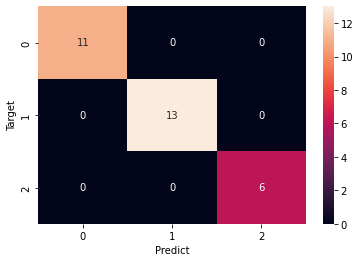

In [18]:
sns.heatmap(cf_matrix, annot=True)
plt.ylabel("Target")
plt.xlabel("Predict")